# Analyse der Git-Historie des Linux Kernels

## Einleitung
Mit diesem Arbeitsblatt erlernen wir die ersten Schritte mit Jupyter, Python, pandas und matplotlib anhand eines praktischen Beispiels: Der Analyse der Entwicklungsgeschichte des Linux Kernels.

Das komplette und ausführlich beschriebene Mini-Tutorial ist auch auf meinem Blog zu finden unter https://www.feststelltaste.de/mini-tutorial-git-log-analyse-mit-python-und-pandas/.

## Aufgabe
* Wir wollen herausfinden,
 * wer die TOP 10 Autoren mit den häufigsten Commits (=Codeänderungen) sind
 * zu welcher Tagesstunde die meisten Commits vorgenommen werden.
 
Als Basis haben wir einen Datensatz in einer Datei, der uns pro Commit den Zeitstempel sowie den Autor der Codeänderung aufführt:

```
timestamp,author
2017-12-31 14:47:43,Linus Torvalds
2017-12-31 13:13:56,Linus Torvalds
2017-12-31 13:03:05,Linus Torvalds
2017-12-31 12:30:34,Linus Torvalds
2017-12-31 12:29:02,Linus Torvalds
```

Diese Daten habe ich mir im Grunde über `git` (https://git-scm.com) aus dem GitHub-Repository https://github.com/torvalds/linux/ erzeugen lassen (und für das Mini-Tutorial ein wenig vereinfacht...).

Aber der Reihe nach &ndash; lernen wir ersteinmal die Werkzeuge näher kennen.

## Jupyter
Jupyter biete uns Code und Dokumentation in ausführbare **Zellen**.

#### Codeausführung

1. Wähle die nächste Zelle aus (Mausklick oder mit Pfeiltasten).
1. Führe die Zelle mit einem `Strg`+`Enter` aus. 
1. Führe die Zelle noch einmal mit `Shift`+`Enter`. *Was ist der Unterschied der **Ergebnissausgabe** *?

In [1]:
"Hello World"

'Hello World'

#### Neue Zelle anlegen
1. Wenn noch nicht passiert, wähle diese Zelle aus.
1. Gehe in den **Befehlsmodus**, auswählbar mit Taste `ESC`.
1. Erstelle nach diesem Text eine **neue Zelle** mit der Taste `b`. 
1. Wechlse den **Zelltyp** zu "Markdown" mit Taste `m`.
1. Wechlse in den **Eingabemodus** mit `Enter`.
1. Schreibe einen Text, den Du dann mit `Strg` + `Enter` "ausführst".

Das ist ein Text

## Python
Wir sehen uns sehr grundlegende Funktionen an:

- Variablenzuweisungen
- Wertebereichszugriffe
- Methodenaufrufe

#### Text einer Variable zuweisen
1. Schreibe den Text "Hello World" per **Zuweisung** `=` in die **Variable** `text`.
1. Schreibe die Variable `text` in die nächste Zeile und führe die Zelle aus.

In [2]:
text = "Hello World"
text

'Hello World'

#### Auf Werte zugreifen
1. Greife mit `[0]` auf den ersten Buchstaben in `text` zu.

In [3]:
text[0]

'H'

#### Letzten Wert wählen
1. Greife mit `[-1]` auf den letzten Buchstaben in `text` zu.

In [4]:
text[-1]

'd'

#### Wertebereiche wählen
1. Greife mit dem **Slice** `[2:5]` auf einen Bereich von `text` zu.

In [5]:
text[2:4]

'll'

#### Autovervollständigung
1. Hänge einen `.` an `text` und siehe Dir die Funktionen mit der Taste `Tab` an.
1. Führe die **Methode** `upper()` aus (Tipp: Tippe ein `u` in der Funktionsübersicht).

In [6]:
text.upper()

'HELLO WORLD'

#### Interaktive Dokumentation
1. Wähle die Funktion `split` von `text`.
1. Drücke `Shift`+`Tab`.
1. Drücke `Shift`+`Tab` zweimal schnell hintereinander.
1. Drücke `Shift`+`Tab` viermal schnell hintereinander (und anschlißend `ESC` zum ausblenden) 
1. Teile mit `split` den Text in `text` anhand der `l`s genau einmal auf.

In [7]:
text.split("l",maxsplit=1)

['He', 'lo World']

## Pandas

### Daten importieren

#### Modul laden
1. Importiere das Modul `pandas` mit `import <modulname> as <kuerzel>` als abgekürztes `pd`
1. Schau Dir in der nächsten Zeile mit einem angehängten `?` an, was in der Variable `pd` nun steckt.

In [8]:
import pandas as pd
pd?

#### Datei einlesen
1. Lese mit der `read_csv`-Methode die Daten von der Adresse ein, die in `PFAD` steht.
1. Schreibe das Ergebnis in die Variable `git_log`.
1. Zeige die ersten fünf Einträge (= Commits aka Codeänderungen) in `git_log` mit der Methode `head()` an.

In [9]:
PFAD = "../dataset/git_demo_timestamp_linux.gz"

git_log = pd.read_csv(PFAD)
git_log.head()

,timestamp,author
0,2017-12-31 14:47:43,Linus Torvalds
1,2017-12-31 13:13:56,Linus Torvalds
2,2017-12-31 13:03:05,Linus Torvalds
3,2017-12-31 12:30:34,Linus Torvalds
4,2017-12-31 12:29:02,Linus Torvalds


#### Daten kennenlernen
1. Rufe `info()` auf `git_log` auf.

In [10]:
git_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723214 entries, 0 to 723213
Data columns (total 2 columns):
timestamp    723214 non-null object
author       723213 non-null object
dtypes: object(2)
memory usage: 11.0+ MB


Wir sehen, dass in `git_log` 
* ein **DataFrame** steckt, der aus
 * zwei Spalten (sog. **Series**) besteht. 
* Wir sehen auch, dass wir
 * 723214 Einträge in der Spalte `timestamp` (=Commit-Zeitpunkt) haben
 * aber nur 723213 bei `author` (=Programmierer).

#### Datenfehler erkennen

1. Greife auf die Spalte `author` mit der Schreibweise `git_log.author` zu.
1. Berechne fehlende Autor mit einem angehängten `.isnull()`-Aufruf.
1. Schreibe das Ergebnis in `missing`.
1. Gib die ersten fünf Einträge von `missing` aus.

In [11]:
missing = git_log.author.isnull()
missing.head()

0    False
1    False
2    False
3    False
4    False
Name: author, dtype: bool

#### Daten selektieren
1. Selektiere alle fehlenden Autoren in `git_log` mit dem **Selektor**  `[<Series>]` und Daten in der Series `missing`.

In [12]:
git_log[missing]

,timestamp,author
719027,2005-07-01 23:27:00,NaN


### Daten aggregieren

#### Top 10 Autoren
1. Zähle die Anzahl der Commits pro Autor der Spalte `author` in `git_log` mit der Methode `value_counts()`.
1. Liste nur die TOP 10 der am häufigst vorkommenden Autoren auf.
1. Speichere das Ergebnis in der Variable `top10`.
1. Liste das Ergebnis in `top10` auf.

In [13]:
top10 = git_log.author.value_counts().head(10)
top10

Linus Torvalds           24259
David S. Miller           9563
Mark Brown                6917
Takashi Iwai              6293
Al Viro                   6064
H Hartley Sweeten         5942
Ingo Molnar               5462
Mauro Carvalho Chehab     5384
Arnd Bergmann             5305
Greg Kroah-Hartman        4687
Name: author, dtype: int64

## matplotlib
### Visualisierung

#### Plotte Diagramm
1. Weise Jupyter mit `%matplotlib inline` an, erzeugte Grafiken direkt im Notebook darzustellen.
1. Erzeuge mit `plot()` auf der Series `top10` ein Diagramm.

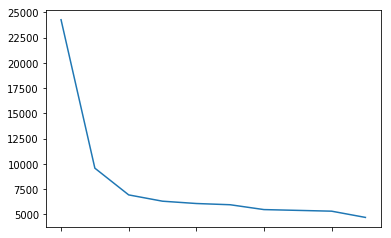

In [14]:
%matplotlib inline
top10.plot()

#### Balkendiagramm erstellen
1. Rufe die Untermethode `bar()` von `plot` für die Daten in `git_log` auf.

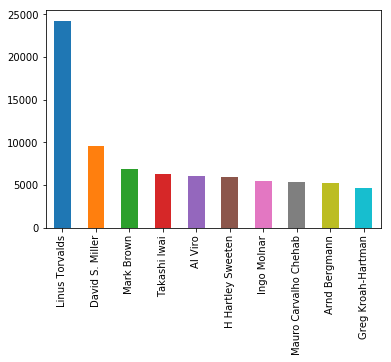

In [15]:
top10.plot.bar()

#### Ausgabe verschönern
1. Hänge ein `;` an den Aufruf oben und führe ihn erneut aus. *Was hat sich geändert?*

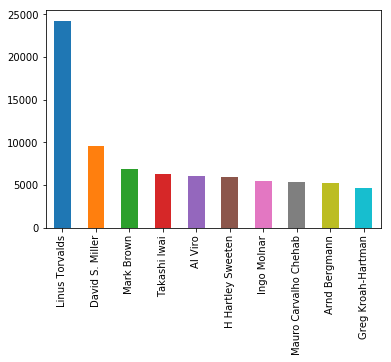

In [16]:
top10.plot.bar();

#### Tortendiagramm erstellen
1. Rufe die Untermethode `pie()` von `plot` für die Daten in `top10` auf.

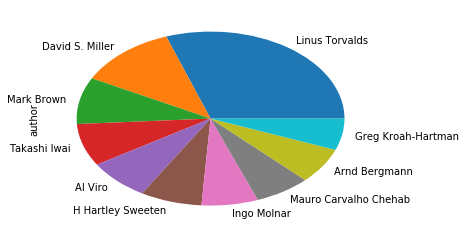

In [17]:
top10.plot.pie();

#### Verschönertes Tortendiagramm zaubern

1. Erstelle noch einmal ein Tortendiagramm, diesmal direkt mit `plot()` der Series `top10` und mit folgenden Parametern:  
 * `kind="pie"`
 * `figsize=[7,7]`
 * `title="Top 10 Autoren"`
 * `label=""`  

*Tipp: Nutze die Autovervollständigung.*

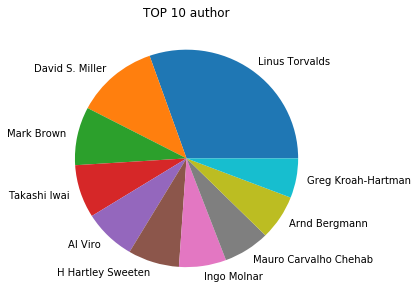

In [18]:
top10.plot(
    kind='pie',
    title="TOP 10 author",
    label="",
    figsize=[5,5]);

## Zeitreihenanalyse

#### Zeitstempelspalte ansehen
1. Zeige die ersten fünf Einträge der Series `timestamp` an.

In [19]:
git_log.timestamp.head()

0    2017-12-31 14:47:43
1    2017-12-31 13:13:56
2    2017-12-31 13:03:05
3    2017-12-31 12:30:34
4    2017-12-31 12:29:02
Name: timestamp, dtype: object

#### Datentypkonvertierung
1. Wandle mit Hilfe der Pandas-Funktion `pd.to_datetime` die Spalte `timestamp` in einen echten Datumsdatentyp um.
1. Schreibe das Ergebnis in die neue Variable `ts` (Abkürzung für "timestamp").
1. Gibt die ersten fünf Einträge aus.

In [20]:
ts = pd.to_datetime(git_log.timestamp)
ts.head()

0   2017-12-31 14:47:43
1   2017-12-31 13:13:56
2   2017-12-31 13:03:05
3   2017-12-31 12:30:34
4   2017-12-31 12:29:02
Name: timestamp, dtype: datetime64[ns]

#### Mit Zeitdaten arbeiten
1. Greife auf das Datumsobjekt `dt` der Variable `ts` zu.
1. Zeige die Stunden über die Eigenschaft `hour` des `dt`-Objekts an.
1. Gebe die ersten fünf Einträge aus.

In [21]:
ts.dt.hour.head()

0    14
1    13
2    13
3    12
4    12
Name: timestamp, dtype: int64

#### Commit-Lieblingszeit herausfinden
1. Zähle die Häufigkeit der Commits pro Stunde.
 1. Schallte hier die Sortierung mit dem Parameter `sort=False` aus.
1. Speichere das Ergebnis in `commits_je_stunde`.

In [22]:
commits_je_stunde = ts.dt.hour.value_counts(sort=False)
commits_je_stunde.head()

0    19533
1    15044
2    10420
3     7000
4     6068
Name: timestamp, dtype: int64

#### Endergebnis
1. Plotte ein Balkendiagramm über die stündliche Commit-Anzahl.

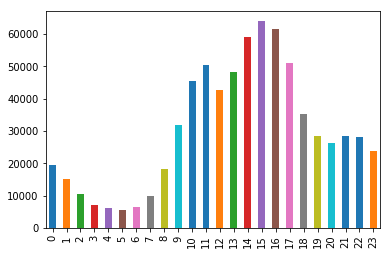

In [23]:
commits_je_stunde.plot.bar();

## Was jetzt noch alles fehlt
Wir haben jetzt einige Grundlagen zu Pandas kennengelernt. Damit kommen wir schon sehr weit in der täglichen Arbeit. Die anderen wichtigen Themenbereiche, die nun noch fehlen, sind:
* Einlesen komplizierter, semistrukturierte Datenstrukturen
* Umfassende Bereinigung von schlechter Datenqualität
* Zusammenführen verschiedener Datenquellen
* Gruppieren von gleichartigen Daten mittels `groupby`
* Umformen von `DataFrame`s mittels `pivot_table`

## Zusammenfassung
Ich hoffe, dass ich Dir mit diesem Mini-Tutorial das Potenzial von Datenanalysen mittels Jupyter, Python und matplotlib näherbringen konnte. 

Über Anmerkungen und Feedback freue ich mich!  

   
## Kontakt
 
**Markus Harrer**  
Blog: https://www.feststelltaste.de  
Mail:  <a href="mailto:talk@markusharrer.de">talk@markusharrer.de</a>    
Twitter: [@feststelltaste](https://twitter.com/feststelltaste)  
Beratung und Training: http://markusharrer.de